In [1]:
import numpy as np
import sys
import os
from dask.distributed import Client

sys.path.append(os.path.abspath('../../data_processing'))
from process_urls_dask import get_M3_urls, process_urls_in_parallel
from utils_dask import plot_polar_data

# Set up the Dask client
client = Client(n_workers=4, threads_per_worker=2,memory_limit='4GB')

/home/as5023/ACSE/irp-as5023/data_processing/process_image_dask.py:143: SyntaxWarning: invalid escape sequence '\s'
  calib_data = pd.read_csv(io.StringIO(response.text), sep='\s+', header=None, names=["Channel", "Wavelength"])


In [3]:
M3_data_home = 'https://planetarydata.jpl.nasa.gov/img/data/m3/CH1M3_0004_md5.txt'

# Get and print all .lbl file URLs from the given page
M3_data_urls = get_M3_urls(M3_data_home, '.LBL', 'DATA')
print(f"Found {len(M3_data_urls)} M3 data files")

M3_data_urls = M3_data_urls[:2]

M3_data_df = process_urls_in_parallel(client, M3_data_urls, 'M3').compute()
print("Files processed successfully")

Found 887 M3 data files
Files processed successfully


Number of NaNs in LOLA Albedo data: 13 out of 126666 (0.01%)

Number of lats between -85 and -90: 0 (0.00%)
           Longitude       Latitude             M3
count  126666.000000  126666.000000  126653.000000
mean       88.457603      87.902512       0.771948
std        14.581050       1.676476       0.220522
min         0.044347      75.002884       0.047324
25%        87.471537      87.478188       0.627526
50%        88.180744      88.179390       0.751652
75%        88.766975      88.759989       0.889531
max       359.959930      89.996857       1.931729


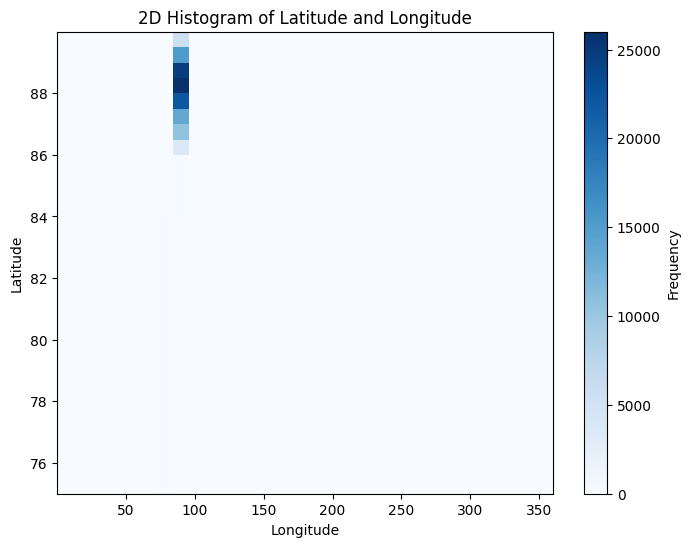

Latitude range: 75.00288391113281 to 89.99685668945312
Second latitude: 78.38652801513672
No data for South Pole
Plotting 126627 data points...


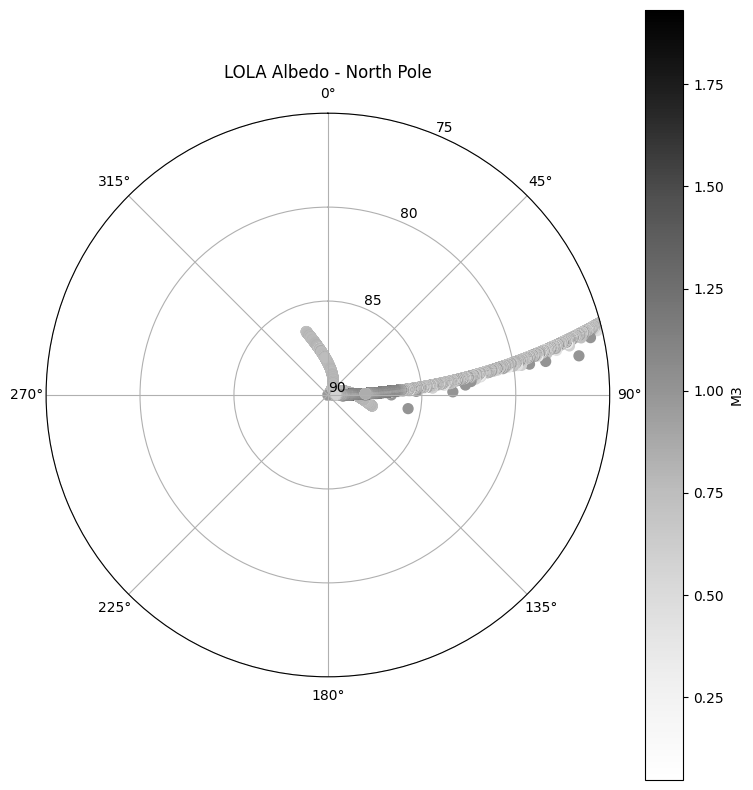

In [4]:
print(f"Number of NaNs in LOLA Albedo data: {np.isnan(M3_data_df["M3"]).sum()} out of {np.prod(M3_data_df["M3"].shape)} ({(np.isnan(M3_data_df["M3"]).sum()/np.prod(M3_data_df["M3"].shape)*100):.2f}%)\n")

print(f'Number of lats between -85 and -90: {(M3_data_df["Latitude"] <= -85).sum()} ({(M3_data_df["Latitude"] <= -85).sum()/len(M3_data_df)*100:.2f}%)')

print(M3_data_df.describe())

import matplotlib.pyplot as plt

# 2D Histogram
plt.figure(figsize=(8, 6))

plt.hist2d(M3_data_df['Longitude'], M3_data_df['Latitude'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Histogram of Latitude and Longitude')
plt.show()

plot_polar_data(M3_data_df, 'M3', frac=None, title_prefix='M3 values')

client.close()